# Proyecto 1 Jose Buxo (Accidentes USA 2016-2023)

### Imports

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carga De Datos

In [25]:
df = pd.read_csv('../data/accidents.csv')
df.sample(5) # Veamos

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6448893,A-6496498,Source1,2,2021-02-11 15:51:00,2021-02-11 18:07:43,39.949008,-75.185195,39.948378,-75.186237,0.070,...,False,False,False,False,False,False,Day,Day,Day,Day
2678098,A-2687971,Source2,2,2018-07-05 18:38:16,2018-07-05 19:08:05,34.677582,-82.874504,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
5169992,A-5209192,Source1,2,2022-09-05 05:39:30,2022-09-05 07:46:53,38.672195,-80.722479,38.672530,-80.720715,0.098,...,False,False,False,False,False,False,Night,Night,Night,Day
3616391,A-3626274,Source1,2,2017-06-01 18:05:05,2017-06-02 00:05:05,40.066580,-74.161710,40.049910,-74.172410,1.283,...,False,False,False,False,False,False,Day,Day,Day,Day
2891649,A-2901528,Source2,3,2018-04-22 17:31:05,2018-04-22 18:00:22,34.102070,-118.249619,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

# Aqui veo algunas sospechosos, que no se les entiende el contexto o no aportan valor
# Para ver que son mas cercanamente:
# Source *
# Start y End time *
# Start and end lat + lng (parece ser coordenadas GPS) - igual me sirve para hacer mapas geoespaciales *
# Distance (mi) * 
# Timezone , no veo como para que haria falta *
# Airport code? para que aeropuertos *
# Weather timestamps - no se que significade un timestamp de clima *
# amenity, ni idea
# Country, creo que todos son US

# ---------- parecen ser lugares cercanos o locacion de el accidente -----------
# 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway','roundabout', *
# 'station', 'stop', 'traffic_calming', 'traffic_signal','turning_loop' *
# --------------------------------------------------------------------------------

# sunrise_sunset - quizas se compare con la hora de el accidente para saber horas comunes *
# 'civil_twilight', 'nautical_twilight', 'astronomical_twilight' - no tengo claro para que sirve esto en una explorcaion de accidentes

Index(['id', 'source', 'severity', 'start_time', 'end_time', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 'description',
       'street', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [27]:
# df.isnull().sum() # veamos nulos -> no lo entendi como numeros, hay muchos. vayamos por porcentajes
df.isnull().sum() / len(df) * 100

# vemos que lat y lng tiene 44% de nulos, quizas no sea tan util
# tambien precipitacion le falta 28% de los datos, quizas sean null significando que no hubo precipitacion

id                        0.000000
source                    0.000000
severity                  0.000000
start_time                0.000000
end_time                  0.000000
start_lat                 0.000000
start_lng                 0.000000
end_lat                  44.029355
end_lng                  44.029355
distance(mi)              0.000000
description               0.000065
street                    0.140637
city                      0.003274
county                    0.000000
state                     0.000000
zipcode                   0.024779
country                   0.000000
timezone                  0.101030
airport_code              0.292881
weather_timestamp         1.555666
temperature(f)            2.120143
wind_chill(f)            25.865904
humidity(%)               2.253301
pressure(in)              1.820288
visibility(mi)            2.291524
wind_direction            2.267043
wind_speed(mph)           7.391355
precipitation(in)        28.512858
weather_condition   

In [28]:
df.duplicated().sum() # 0 duplicados, interesante

np.int64(0)

## Exploracion De Datos Suspechosos

In [ ]:
# Source
df['source'].unique()
# Se nos resulta inutil, no sabemos a que se refiere source2, source1, y source3

array(['Source2', 'Source3', 'Source1'], dtype=object)

In [32]:
# La soltamos
df = df.drop(columns=['source'])


KeyError: "['source'] not found in axis"

In [ ]:
df.sample()
# veamos el start y end time
# df[['start_time', 'end_time']].sample(5)

# Entendamos la diferenceia entre start y end time
# df.iloc[1344292]['start_time'] - df.iloc[1344292]['end_time']

# Son string -> convertimos a datetime
df['start_time'] = pd.to_datetime(df['start_time'], format='mixed')
df['end_time'] = pd.to_datetime(df['end_time'], format='mixed')

df[['start_time' , 'end_time']].dtypes # ahora tenemos datetime en datetime con nanosegundos
df.iloc[1344292]['end_time'] - df.iloc[1344292]['start_time']  # intentamos de nuevo

# Vemos que el timedelta son 45 minutos, no tiene sentido que un accidente dure tanto,
# asi que asumimos que son la hora de llegada y salida del oficial que reporta el accidente
# se nos puede hacer util para ver cuanto tiempo se tarde en atender, o si la severidad afecta el tiempo de atencion, etc

Timedelta('0 days 00:45:11')

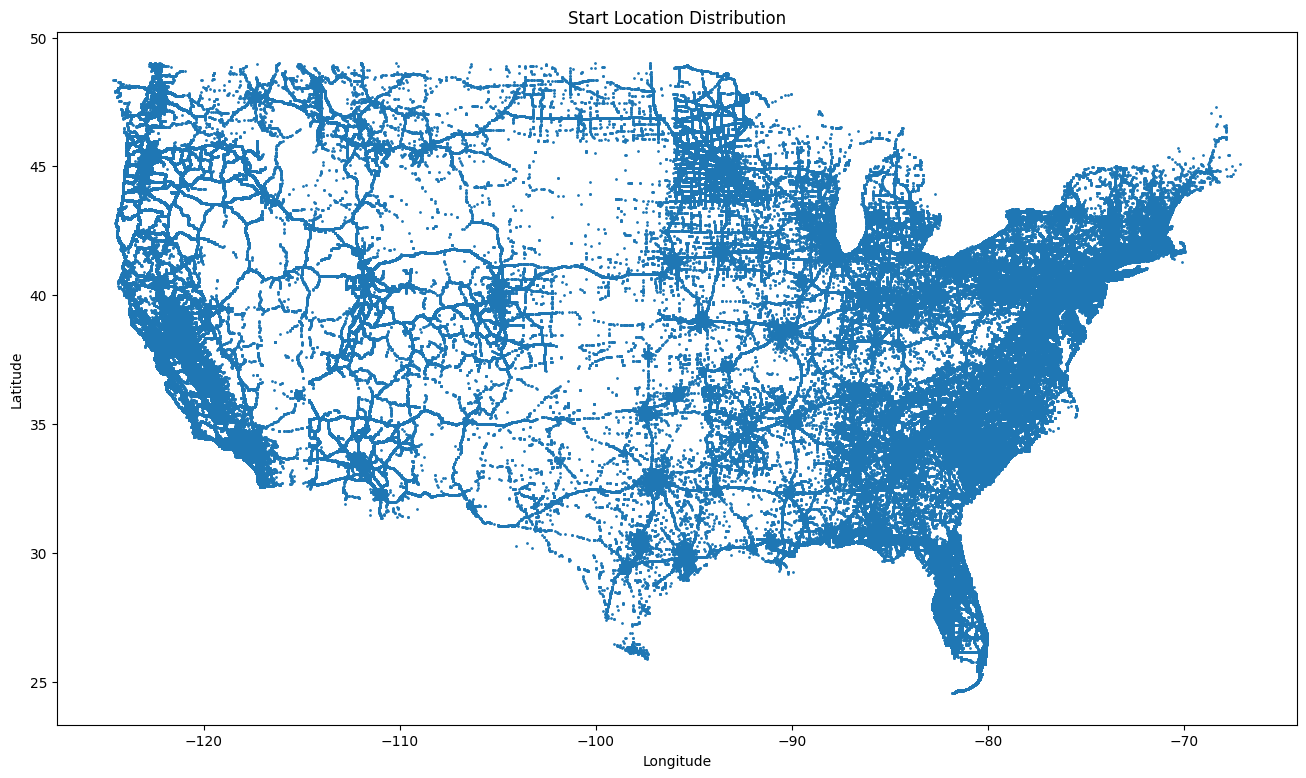

In [ ]:
# Start and end lat + lng
sample = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].sample(5)
# no entendi bien que es eso, pero asumiendo que son coordernadas hago un mapa

plt.figure(figsize=(16, 9))
plt.scatter(df['start_lng'], df['start_lat'], s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start Location Distribution")
plt.show()

# El mapa claramene muestra que los accidentes estan en USA, y en efecto son coordenadas GPS, quizas nos sean utiles para algo

In [ ]:
# Distance(mi), puede ser la distancia entre start y end?
# df[['distance(mi)', 'start_lat', 'start_lng', 'end_lat', 'end_lng']].sample(10)
# De acuerdo con la fuente de los datos, es la cantidad de calle que vio efectos de trafico por el accidente
# Quizas sea util para ver severidad vs distancia, o locacion vs distancia
# Convirtamos a km
df['distancia_afectada_km'] = df['distance(mi)'] * 1.60934
df

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,distancia_afectada_km
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,Night,Night,Night,Night,0.016093
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,Night,Night,Night,Day,0.016093
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,True,False,Night,Night,Day,Day,0.016093
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,Night,Day,Day,Day,0.016093
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,True,False,Day,Day,Day,Day,0.016093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,0.873872
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,0.543957
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,Day,Day,Day,Day,0.902840
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,1.242410


In [88]:
# soltamos distance(mi)
df = df.drop(columns=['distance(mi)'])
df

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,description,street,...,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,distancia_afectada_km
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,False,False,Night,0.016093
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,False,False,Night,0.016093
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,False,False,True,False,Night,0.016093
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,False,False,Night,0.016093
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,False,False,True,False,Day,0.016093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,At Market St - Accident.,Pomona Fwy E,...,False,False,False,False,False,False,False,False,Day,0.873872
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,False,False,False,False,False,False,False,False,Day,0.543957
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,False,False,False,False,False,False,False,False,Day,0.902840
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,...,False,False,False,False,False,False,False,False,Day,1.242410


In [ ]:
# Timezone, veamos que hay
df['timezone'].unique() # no se ve muy util, ya que para los analysis que quiero hace solo hace falta la hora local.
# La hora local ya esta en start_time y end_time, asi que la soltamos


array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

In [66]:
# La soltamos
# df = df.drop(columns=['timezone'])
df.sample(5)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,distancia_afectada_km
6643785,A-6692405,2,2020-10-29 16:13:00,2020-10-29 19:48:00,41.621556,-72.692658,41.641029,-72.678981,1.520,Slow traffic on I-91 from CT-372/Exit 21 (I-91...,...,False,False,False,False,False,Day,Day,Day,Day,2.446197
6281957,A-6328208,2,2021-05-21 04:50:00,2021-05-21 14:23:23,35.049882,-80.769334,35.060927,-80.769882,0.764,Stationary traffic on NC-16 from NC-84/Wedding...,...,False,False,False,False,False,Night,Night,Night,Day,1.229536
2918771,A-2928650,3,2018-03-06 05:47:31,2018-03-06 06:17:11,38.959663,-76.866058,NaN,NaN,0.000,Accident on I-95 Capital Beltway Southbound at...,...,False,False,False,False,False,Night,Night,Day,Day,0.000000
5724074,A-5767077,2,2021-07-26 08:14:00,2021-07-26 10:15:33,35.019816,-120.476067,35.020980,-120.474471,0.121,Incident on SOUTHLAND ST near TWILIGHT LN Driv...,...,False,False,False,False,False,Day,Day,Day,Day,0.194730
2445519,A-2455391,3,2018-11-14 17:27:43,2018-11-14 17:57:27,38.137138,-85.706734,NaN,NaN,0.000,Accident on I-65 Southbound at Exits 127 128 K...,...,False,False,False,False,False,Day,Day,Day,Day,0.000000


In [ ]:
# Airport Code 
# Segun la fuente de datos, muestra el codigo de la estacion de clima basada en el aeropuerto mas cercano
df['airport_code'].unique()
# no le veo uso

KeyError: 'airport_code'

In [ ]:
# La soltamos
df = df.drop(columns=['airport_code'])

In [ ]:
# Weather timestamps
df[['weather_timestamp']].sample(5)
# Esto muestra la hora que se tomo la informacion del clima en tiempo local. Tampoco le veo el uso para mi analisis.

,weather_timestamp
263067,2016-12-08 18:15:00
7558271,2018-03-20 16:53:00
488990,2017-06-29 13:53:00
7564649,2018-02-02 12:10:00
2941711,2018-03-16 18:47:00


In [76]:
# la soltamos
df = df.drop(columns=['weather_timestamp'])

In [ ]:
# Amenity - muestra si hay algun punto de interes cerca del accidente, pero esta en boolean - no veremos que tipo hay :(
df['amenity'].unique()

# Igual es util para ver si hay correclacion entre accidentes y puntos de interes

array([False,  True])

In [ ]:
# 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway','roundabout',
# 'station', 'stop', 'traffic_calming', 'traffic_signal','turning_loop'
# 
elementos_de_trafico = df[['bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway','roundabout','station',
    'stop', 'traffic_calming', 'traffic_signal','turning_loop']]

# Muestra si estos existen cerca del accidente. Puede ser util para saber si hay correlacion entre accidentes y estos elementos de trafico
# Igual y hay manera de agruparlos en una sola columna "elementos_de_trafico" de tipo lista o algo.

elementos_de_trafico.sum().sort_values(ascending=False)
# aqui vemos la cantidad de valores true por cada tipo, me sirve


traffic_signal     1143772
crossing            873763
junction            571342
stop                214371
station             201901
railway              66979
give_way             36582
no_exit              19545
traffic_calming       7598
bump                  3514
roundabout             249
turning_loop             0
dtype: int64

In [ ]:
# Sunrise sunset
df['sunrise_sunset'].unique()
# tenemos Night y Day - Dia y noche. Esta columna nos dice a que hora paso el accidente basada en la hora de la puesta del sol
# igual y le cambiamos el nombre a 'day_night'

array(['Night', 'Day', nan], dtype=object)

In [ ]:
# 'civil_twilight', 'nautical_twilight', 'astronomical_twilight' los twilight tambien muestran day o night basados en otros estandares.


elementos_twilight = df[['civil_twilight', 'nautical_twilight', 'astronomical_twilight']]

# convertimos a algo numerico 
elementos_twilight.apply(pd.Series.value_counts)
df[['civil_twilight', 'nautical_twilight', 'astronomical_twilight']].head(10)
# no le veo uso, me sirve solo con el sunrise_sunset

,civil_twilight,nautical_twilight,astronomical_twilight
0,Night,Night,Night
1,Night,Night,Day
2,Night,Day,Day
3,Day,Day,Day
4,Day,Day,Day
5,Day,Day,Day
6,Day,Day,Day
7,Day,Day,Day
8,Day,Day,Day
9,Day,Day,Day


In [87]:
# Las soltamos
df = df.drop(columns=['civil_twilight', 'nautical_twilight', 'astronomical_twilight'])
df

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,distancia_afectada_km
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,False,False,Night,0.016093
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,False,False,Night,0.016093
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,False,False,True,False,Night,0.016093
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,False,False,Night,0.016093
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,False,False,True,False,Day,0.016093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,False,False,Day,0.873872
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,False,False,Day,0.543957
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,False,False,Day,0.902840
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,False,False,Day,1.242410
